In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import sklearn

In [17]:
data = pd.read_csv("diabetes.csv", nrows = 50)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='BMI', ylabel='Outcome'>

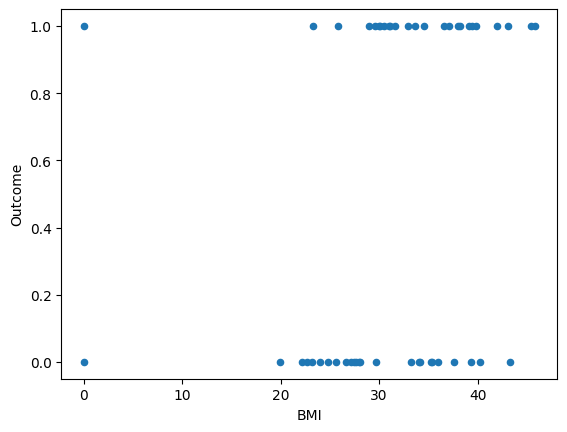

In [20]:
data.plot.scatter(x='BMI' , y= 'Outcome')

In [21]:
X = data['BMI'].to_numpy()
Y = data['Outcome'].to_numpy()

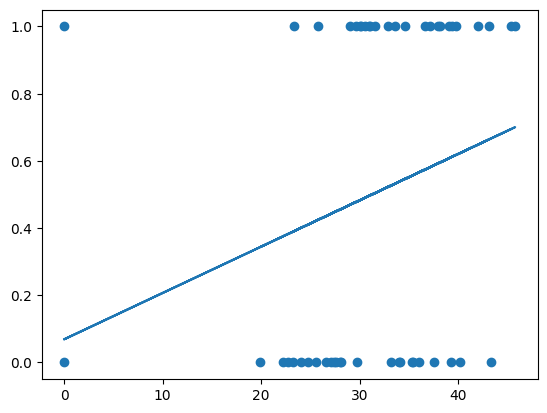

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
linreg = LinearRegression()
linreg.fit(X.reshape(-1,1),Y)
plt.scatter(X,Y)
plt.plot(X, linreg.predict(X.reshape(-1,1)))